In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Colab_Notebooks/big_data/project

/content/drive/MyDrive/Colab_Notebooks/big_data/project


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 48.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=d6d81d0d523e7251458a62c0b99e117459f952b7c75b9c21d2ee563f81451490
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Rea

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
nltk.download('stopwords')
!pip install swifter
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 647 kB 5.2 MB/s 
     |████████████████████████████████| 280 kB 43.1 MB/s 
     |████████████████████████████████| 136 kB 50.7 MB/s 
  Created wheel for swifter: filename=swifter-1.1.3-py3-none-any.whl size=13078 sha256=a40182758064eb28d61503ba33fe1b97ee3562bcd7d1ad9be954d8a8cd94a5ab
  Stored in directory: /root/.cache/pip/wheels/e8/1a/1b/46aa7b0fac16d3ce1bccaac14bfe4fad972642217ae78d8160
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv('DisneylandReviews.csv', encoding='iso-8859-1', na_values='missing')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         40043 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [ ]:
data[data['Review_ID'].isin(data['Review_ID'][data['Review_ID'].duplicated()])].sort_values('Review_ID')

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
9188,121568004,3,2011-12,United States,"Having been to both, Hong Kong Disney land is ...",Disneyland_HongKong
9178,121568004,3,2011-12,United States,"Having been to both, Hong Kong Disney land is ...",Disneyland_HongKong
9177,121570980,4,2011-11,Canada,"Great for first timers, not so great for those...",Disneyland_HongKong
9187,121570980,4,2011-11,Canada,"Great for first timers, not so great for those...",Disneyland_HongKong
9186,121578357,5,2011-12,Singapore,Like all the rides & show. Took photo with som...,Disneyland_HongKong
9176,121578357,5,2011-12,Singapore,Like all the rides & show. Took photo with som...,Disneyland_HongKong
9185,121580686,4,2011-3,United States,"Very small, they are expanding but at a slow p...",Disneyland_HongKong
9175,121580686,4,2011-3,United States,"Very small, they are expanding but at a slow p...",Disneyland_HongKong
9184,121586148,4,2011-5,Australia,Only a single day adventure. Not as good as d...,Disneyland_HongKong
9174,121586148,4,2011-5,Australia,Only a single day adventure. Not as good as d...,Disneyland_HongKong


In [ ]:
data.drop_duplicates('Review_ID', inplace=True, keep='first')

In [ ]:
data.shape

(42636, 6)

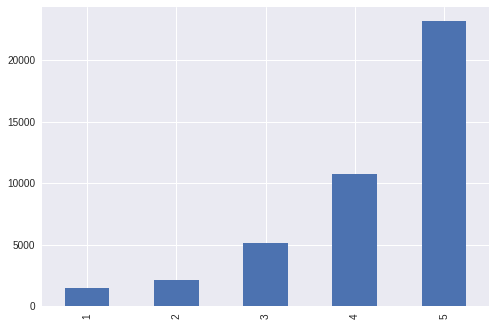

In [ ]:
## count the number of different rating.
data.Rating.value_counts(ascending=True).plot(kind='bar')

In [ ]:
def remap_rating(rating):
    if rating <=3:
        return 'negative'
    elif rating >3:
        return 'positive'  
    else:
        return 'neutral'  
data['Rating_category'] = data['Rating'].apply(lambda rating: remap_rating(rating))

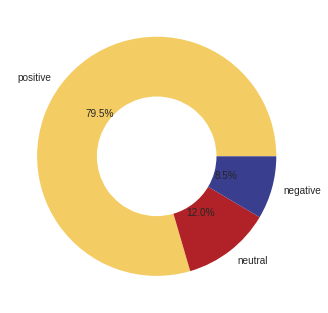

In [ ]:
data['Review_Text'] = data['Review_Text'].astype(str)
class_data = data.groupby('Rating_category').count()['Review_Text'].reset_index().sort_values('Review_Text', ascending=False)
percent_rating = class_data.Review_Text
labels = class_data.Rating_category
colors = ['#F3CC64', '#B12228', '#393E8F']
chart, _, _ = plt.pie(percent_rating, colors=colors, radius=1.0, labels=labels, autopct="%.1f%%")
plt.setp(chart, width=0.5)
plt.show()

## multi-class classification. Imbalanced dataset

In [ ]:
def remap_rating(rating):
    if rating <=3:
        return 'negative'
    elif rating >3:
        return 'positive'    
data['Rating_category'] = data['Rating'].apply(lambda rating: remap_rating(rating))

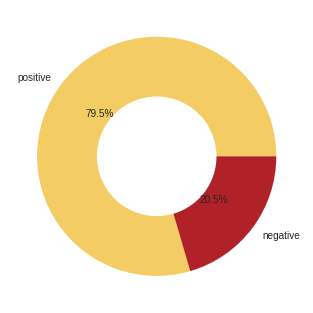

In [ ]:
data['Review_Text'] = data['Review_Text'].astype(str)
class_data = data.groupby('Rating_category').count()['Review_Text'].reset_index().sort_values('Review_Text', ascending=False)
percent_rating = class_data.Review_Text
labels = class_data.Rating_category
colors = ['#F3CC64', '#B12228']
chart, _, _ = plt.pie(percent_rating, colors=colors, radius=1.0, labels=labels, autopct="%.1f%%")
plt.setp(chart, width=0.5)
plt.show()

## Binary classification

In [ ]:
data['Rating'] = data['Rating'].apply(lambda rating: remap_rating(rating))
data = data.drop('Rating_category', axis=1)

In [ ]:
import re
import random

In [ ]:
## Clean the review
def remove_punctuations(review):
    return re.sub(r'(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^\x00-\x7F]+)|([0-9])|(\w+:\/\/\S+)|([^\w\s])|(\s+)', ' ', review)

def rep(review):
    return review.replace('_', ' ')

def whitespace_LT(review):
    return review.strip()

def multispace(review):
    return re.sub(r'\s+', ' ', review)

In [ ]:
data['Review_Text'] = data['Review_Text'].str.lower()
data['Review_Text'] = data['Review_Text'].apply(lambda review: remove_punctuations(review))
data['Review_Text'] = data['Review_Text'].apply(lambda review: rep(review))
data['Review_Text'] = data['Review_Text'].apply(lambda review: whitespace_LT(review))
data['Review_Text'] = data['Review_Text'].apply(lambda review: multispace(review))

In [ ]:
data['Review_Text'][random.randint(0, len(data['Review_Text']))]

'my wife and i took our three young children on a truly magical adventure to disneyland the place is immaculate with attention paid to every detail of the experience the staff are very attentive and helpful the grounds are clean attractive and well designed the attractions are interesting and fun for adults and truly magical for young children the prices are exorbitant but it is clear that the revenue disney receives goes to making a fantastic experience for all'

In [ ]:
## Tokenize the review

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def word_tokenize_wrapper(review):
    return word_tokenize(review)

def freqDist_wrapper(review):
    return FreqDist(review)

In [ ]:
data['Review_Text_Token'] = data['Review_Text'].apply(lambda review: word_tokenize_wrapper(review))

In [ ]:
data

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Review_Text_Token
0,670772142,positive,2019-4,Australia,if you ve ever been to disneyland anywhere you...,Disneyland_HongKong,"[if, you, ve, ever, been, to, disneyland, anyw..."
1,670682799,positive,2019-5,Philippines,its been a while since d last time we visit hk...,Disneyland_HongKong,"[its, been, a, while, since, d, last, time, we..."
2,670623270,positive,2019-4,United Arab Emirates,thanks god it wasn t too hot or too humid when...,Disneyland_HongKong,"[thanks, god, it, wasn, t, too, hot, or, too, ..."
3,670607911,positive,2019-4,Australia,hk disneyland is a great compact park unfortun...,Disneyland_HongKong,"[hk, disneyland, is, a, great, compact, park, ..."
4,670607296,positive,2019-4,United Kingdom,the location is not in the city took around ho...,Disneyland_HongKong,"[the, location, is, not, in, the, city, took, ..."
...,...,...,...,...,...,...,...
42651,1765031,positive,NaN,United Kingdom,i went to disneyland paris in july and thought...,Disneyland_Paris,"[i, went, to, disneyland, paris, in, july, and..."
42652,1659553,positive,NaN,Canada,adults and child of visited disneyland paris b...,Disneyland_Paris,"[adults, and, child, of, visited, disneyland, ..."
42653,1645894,positive,NaN,South Africa,my eleven year old daughter and myself went to...,Disneyland_Paris,"[my, eleven, year, old, daughter, and, myself,..."
42654,1618637,positive,NaN,United States,this hotel part of the disneyland paris comple...,Disneyland_Paris,"[this, hotel, part, of, the, disneyland, paris..."


In [ ]:
data['Review_Text_Token_FreqDist'] = data['Review_Text_Token'].apply(lambda token: freqDist_wrapper(token))

In [ ]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('english')
list_stopwords = set(list_stopwords)

In [ ]:
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [ ]:
data['Review_Text_Token_WSW'] = data['Review_Text_Token'].apply(lambda word: stopwords_removal(word))
data['Review_Text_Token_WSW'].head()

0    [ever, disneyland, anywhere, find, disneyland,...
1    [since, last, time, visit, hk, disneyland, yet...
2    [thanks, god, hot, humid, visiting, park, othe...
3    [hk, disneyland, great, compact, park, unfortu...
4    [location, city, took, around, hour, kowlon, k...
Name: Review_Text_Token_WSW, dtype: object

In [ ]:
from nltk.stem import PorterStemmer
import swifter

stemmer = PorterStemmer()

def stemmer_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['Review_Text_Token_WSW']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))

for term in term_dict:
    term_dict[term] = stemmer_wrapper(term)
    print(term, ':', term_dict[term])
    
print(term_dict)

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['Review_Stemmed'] = data['Review_Text_Token_WSW'].swifter.apply(lambda doc: get_stemmed_term(doc))
print(data['Review_Stemmed'])

Streaming output truncated to the last 5000 lines.
hes : he
coffin : coffin
ratalouee : rataloue
soliders : solid
sussex : sussex
indictment : indict
wain : wain
perzazz : perzazz
ingrain : ingrain
disneyesque : disneyesqu
howya : howya
awl : awl
joelle : joell
epilepsy : epilepsi
pnes : pne
wea : wea
eventuallya : eventuallya
dcould : dcould
tugboat : tugboat
donned : don
orgnised : orgnis
montparnasse : montparnass
freeview : freeview
aaaargh : aaaargh
lucozade : lucozad
addatives : add
thumder : thumder
sarnies : sarni
negantive : negant
languiges : languig
anya : anya
villee : ville
petals : petal
meteor : meteor
francais : francai
yayayay : yayayay
creaks : creak
youo : youo
palate : palat
howeever : howeev
amass : amass
discoverland : discoverland
shurnk : shurnk
finnishes : finnish
haggal : haggal
seing : se
sakequeues : sakequeu
incharacters : incharact
uninterestedoverall : uninterestedoveral
pooradvice : pooradvic
resultant : result
playback : playback
slghtly : slghtli
becam

Pandas Apply:   0%|          | 0/42636 [00:00<?, ?it/s]

0        [ever, disneyland, anywher, find, disneyland, ...
1        [sinc, last, time, visit, hk, disneyland, yet,...
2        [thank, god, hot, humid, visit, park, otherwis...
3        [hk, disneyland, great, compact, park, unfortu...
4        [locat, citi, took, around, hour, kowlon, kid,...
                               ...                        
42651    [went, disneyland, pari, juli, thought, brilli...
42652    [adult, child, visit, disneyland, pari, begin,...
42653    [eleven, year, old, daughter, went, visit, son...
42654    [hotel, part, disneyland, pari, complex, wonde...
42655    [went, disneypari, resort, small, child, minut...
Name: Review_Stemmed, Length: 42636, dtype: object


In [ ]:
cols = ['Rating', 'Review_Stemmed']
data = data[cols]
data.columns = ['labels', 'review']

In [ ]:
import ast
def join(reviews):
    return ' '.join([review for review in reviews])

data['review'] = data['review'].apply(lambda review: join(review))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data.labels.value_counts(normalize=True)

positive    0.79522
negative    0.20478
Name: labels, dtype: float64

In [ ]:
data['labels'] = np.where(data['labels']=='positive',1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data.to_csv('data.csv',index=False)

In [ ]:
data

,labels,review
0,1,ever disneyland anywher find disneyland hong k...
1,1,sinc last time visit hk disneyland yet time st...
2,1,thank god hot humid visit park otherwis would ...
3,1,hk disneyland great compact park unfortun quit...
4,1,locat citi took around hour kowlon kid like di...
...,...,...
42651,1,went disneyland pari juli thought brilliant vi...
42652,1,adult child visit disneyland pari begin feb ab...
42653,1,eleven year old daughter went visit son london...
42654,1,hotel part disneyland pari complex wonder plac...


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.master('local[5]').appName('DataFrame').getOrCreate()

In [ ]:
data = spark.read.csv('data.csv',header=True)

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import LogisticRegression

In [ ]:
from pyspark.ml.feature import Tokenizer

In [ ]:
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import IDF
from pyspark.ml.linalg import DenseVector
from pyspark.ml.linalg import VectorUDT

## tf-idf

In [ ]:
tokenizer = Tokenizer().setInputCol("review").setOutputCol("words")
data = tokenizer.transform(data)

In [ ]:
vectorizer = CountVectorizer(inputCol='words', outputCol='indexedfeatures').fit(data)
data = vectorizer.transform(data)

In [ ]:
regexTokenizer = RegexTokenizer(inputCol="review", outputCol="words")
countVectors = CountVectorizer(inputCol="words", outputCol="features", vocabSize=10000, minDF=5)

In [ ]:
label_stringIdx = StringIndexer(inputCol = "labels", outputCol = "label")
pipeline = Pipeline(stages=[regexTokenizer, countVectors,label_stringIdx])
# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)
dataset.show(5)

+------+--------------------+--------------------+--------------------+-----+
|labels|              review|               words|            features|label|
+------+--------------------+--------------------+--------------------+-----+
|     1|ever disneyland a...|[ever, disneyland...|(8103,[1,3,5,8,9,...|  0.0|
|     1|sinc last time vi...|[sinc, last, time...|(8103,[0,2,4,5,9,...|  0.0|
|     1|thank god hot hum...|[thank, god, hot,...|(8103,[0,1,2,3,9,...|  0.0|
|     1|hk disneyland gre...|[hk, disneyland, ...|(8103,[0,5,6,9,11...|  0.0|
|     1|locat citi took a...|[locat, citi, too...|(8103,[5,12,22,25...|  0.0|
+------+--------------------+--------------------+--------------------+-----+
only showing top 5 rows



In [ ]:
## split data

(trainingData, testData) = dataset.randomSplit([0.7, 0.3])
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 29964
Test Dataset Count: 12672


In [ ]:
trainingData.groupby('labels').count().show()

+------+-----+
|labels|count|
+------+-----+
|     0| 6108|
|     1|23856|
+------+-----+



In [ ]:
trainingData.show()

+------+--------------------+--------------------+--------------------+-----+
|labels|              review|               words|            features|label|
+------+--------------------+--------------------+--------------------+-----+
|     0|absolut love disn...|[absolut, love, d...|(8103,[1,4,6,8,11...|  1.0|
|     0|absolut love disn...|[absolut, love, d...|(8103,[0,1,8,17,1...|  1.0|
|     0|absolut wast mone...|[absolut, wast, m...|(8103,[1,2,3,4,21...|  1.0|
|     0|accompani friend ...|[accompani, frien...|(8103,[0,3,4,6,8,...|  1.0|
|     0|actual experi far...|[actual, experi, ...|(8103,[0,1,2,3,5,...|  1.0|
|     0|actual feel disne...|[actual, feel, di...|(8103,[5,7,11,19,...|  1.0|
|     0|actual get wast m...|[actual, get, was...|(8103,[0,4,7,22,2...|  1.0|
|     0|actual hong kong ...|[actual, hong, ko...|(8103,[0,1,2,3,4,...|  1.0|
|     0|actual littl disn...|[actual, littl, d...|(8103,[2,4,9,30,3...|  1.0|
|     0|actual park quit ...|[actual, park, qu...|(8103,[0,4,19,

## Modeling

In [ ]:
lr = LogisticRegression(threshold=0.01)
lrModel = lr.fit(trainingData)

In [ ]:
predictions = lrModel.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
    .select("probability","labels","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+-----------+------+----------+
|probability|labels|prediction|
+-----------+------+----------+
|  [1.0,0.0]|     0|       0.0|
|  [1.0,0.0]|     0|       0.0|
|  [1.0,0.0]|     0|       0.0|
|  [1.0,0.0]|     0|       0.0|
|  [1.0,0.0]|     0|       0.0|
|  [1.0,0.0]|     0|       0.0|
|  [1.0,0.0]|     0|       0.0|
|  [1.0,0.0]|     0|       0.0|
|  [1.0,0.0]|     0|       0.0|
|  [1.0,0.0]|     0|       0.0|
+-----------+------+----------+
only showing top 10 rows



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
evaluator = BinaryClassificationEvaluator(rawPrediction="prediction")
evaluator.evaluate(predictions)

In [ ]:
predictions.show()

+------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|labels|              review|               words|            features|label|       rawPrediction|         probability|prediction|
+------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|     0|abomin hong kong ...|[abomin, hong, ko...|(8103,[0,13,16,74...|  1.0|[-36.561804743604...|[1.32254345746809...|       1.0|
|     0|absolut disney fa...|[absolut, disney,...|(8103,[1,2,3,4,5,...|  1.0|[-69.672250645841...|[5.51729242355720...|       1.0|
|     0|actual small vers...|[actual, small, v...|(8103,[0,4,5,21,5...|  1.0|[29.0712576689000...|[0.99999999999976...|       0.0|
|     0|actual wors small...|[actual, wors, sm...|(8103,[0,3,4,6,8,...|  1.0|[15.7612178649063...|[0.99999985711389...|       0.0|
|     0|advic other keep ...|[advic, other, ke...|(8103,[0,1,2,3,8,...|  1.0|[-9.50

In [ ]:
y_true = predictions.select(['label']).collect()
y_pred = predictions.select(['prediction']).collect()

## Final result

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.83     10049
         1.0       0.44      0.67      0.53      2623

    accuracy                           0.75     12672
   macro avg       0.67      0.72      0.68     12672
weighted avg       0.80      0.75      0.77     12672



In [ ]:
confusion_matrix(y_true, y_pred)

array([[7816, 2233],
       [ 873, 1750]])